# Explore Image Sizes

Based on code in: https://docs.fast.ai/vision.transform.html#resize

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai.vision import *
from fastai import *
import pandas as pd
import collections
import math
from pprint import pprint

In [3]:
import numpy as np
np.random.seed(1234)
import torch
torch.manual_seed(1234)

In [4]:
from load_databunch import build_databunch
import fastai_addons   #add plot2 extension -- learn.recorder.plot2()

# Code

Note:  Code lifted directly from fastai documentation, with code fixes

# Config

In [5]:
PATH = Path('')
data_dir = PATH / 'data'
images_full = PATH / 'data' / 'chest_xray'
images_224 = PATH / 'data' / 'chest_xray_224'

In [6]:
images_full.ls()

[WindowsPath('data/chest_xray/test'),
 WindowsPath('data/chest_xray/train'),
 WindowsPath('data/chest_xray/val')]

In [7]:
images_full.ls()[:10]

[WindowsPath('data/chest_xray/test'),
 WindowsPath('data/chest_xray/train'),
 WindowsPath('data/chest_xray/val')]

In [8]:
data = ImageDataBunch.from_folder(images_full, valid='val', test='test')

C:\Users\ddwil\Anaconda3\envs\fastai\lib\site-packages\fastai\basic_data.py:271: UserWarning: It's not possible to collate samples of your dataset together in a batch.
Shapes of the inputs/targets:
[[torch.Size([3, 307, 502]), torch.Size([3, 1104, 1440]), torch.Size([3, 586, 923]), torch.Size([3, 1352, 1808]), torch.Size([3, 1136, 1488]), torch.Size([3, 616, 848]), torch.Size([3, 752, 1000]), torch.Size([3, 552, 768]), torch.Size([3, 1328, 1736]), torch.Size([3, 1051, 1364]), torch.Size([3, 1352, 1680]), torch.Size([3, 928, 1144]), torch.Size([3, 728, 1128]), torch.Size([3, 1349, 1696]), torch.Size([3, 805, 1148]), torch.Size([3, 528, 920]), torch.Size([3, 1360, 1786]), torch.Size([3, 664, 928]), torch.Size([3, 144, 437]), torch.Size([3, 1271, 1700]), torch.Size([3, 656, 1056]), torch.Size([3, 832, 1664]), torch.Size([3, 504, 832]), torch.Size([3, 1048, 1368]), torch.Size([3, 816, 1224]), torch.Size([3, 523, 927]), torch.Size([3, 1233, 1458]), torch.Size([3, 808, 1144]), torch.Size([3,

You can deactivate this warning by passing `no_check=True`.


In [9]:
data

ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 1858, 2090),Image (3, 1152, 1422),Image (3, 1434, 1810),Image (3, 1279, 1618),Image (3, 1125, 1600)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: data\chest_xray;

Valid: LabelList (16 items)
x: ImageList
Image (3, 1416, 1776),Image (3, 1040, 1272),Image (3, 1416, 1736),Image (3, 928, 1288),Image (3, 1104, 1240)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: data\chest_xray;

Test: LabelList (624 items)
x: ImageList
Image (3, 1317, 1857),Image (3, 1509, 2111),Image (3, 1837, 2031),Image (3, 1326, 1663),Image (3, 1818, 2053)
y: EmptyLabelList
,,,,
Path: data\chest_xray

In [10]:
data.c, data.classes

(2, ['NORMAL', 'PNEUMONIA'])

### Sinces sizes vary image to image, get image size stats

In [11]:
all_sizes = [(s[0], s[1]) for ds in [data.train_ds, data.valid_ds, data.test_ds]
             for img, label in ds for s in [img.size]]
print(all_sizes[0], len(all_sizes))

(1858, 2090) 5856


In [12]:
all_x = [x[0] for x in all_sizes]
all_y = [x[1] for x in all_sizes]
all_ratio = [x[0]/x[1] for x in all_sizes]

Min: 127  Max: 2713  Mean: 971   Median: 888


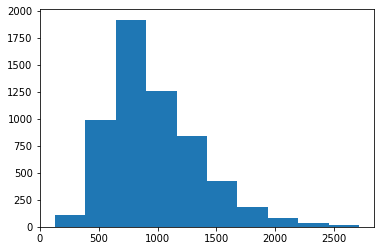

In [13]:
print(f'Min: {np.min(all_x)}  Max: {np.max(all_x)}  Mean: {np.mean(all_x):.0f}   Median: {np.median(all_x):.0f}')

plt.hist(all_x)
plt.show()

Min: 384  Max: 2916  Mean: 1328   Median: 1281


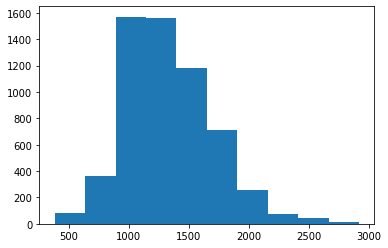

In [14]:
print(f'Min: {np.min(all_y)}  Max: {np.max(all_y)}  Mean: {np.mean(all_y):.0f}   Median: {np.median(all_y):.0f}')

plt.hist(all_y)
plt.show()

Min: 0.29596412556053814  Max: 1.1970443349753694  Mean: 0.71   Median: 0.71


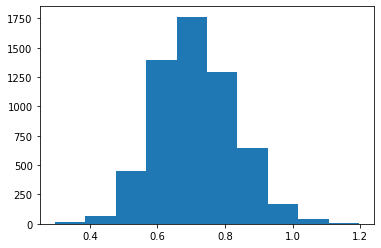

In [15]:
print(f'Min: {np.min(all_ratio)}  Max: {np.max(all_ratio)}  Mean: {np.mean(all_ratio):.2f}   Median: {np.median(all_ratio):.2f}')

plt.hist(all_ratio)
plt.show()

data\chest_xray\train\NORMAL\IM-0135-0001.jpeg
torch.Size([224, 224]) <class 'fastai.vision.image.Image'>


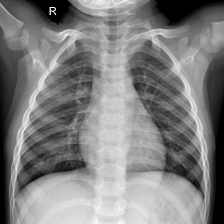

In [16]:
data = ImageDataBunch.from_folder(images_full, valid='val', test='test', size=224)

print(data.train_dl.items[10])
print(data.train_ds[10][0].size, type(data.train_ds[10][0]))
data.train_ds[10][0]

data\chest_xray\train\NORMAL\IM-0135-0001.jpeg
torch.Size([112, 112]) <class 'fastai.vision.image.Image'>


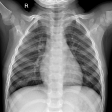

In [17]:
data = ImageDataBunch.from_folder(images_full, valid='val', test='test', size=224//2)

print(data.train_dl.items[10])
print(data.train_ds[10][0].size, type(data.train_ds[10][0]))
data.train_ds[10][0]

data\chest_xray\train\NORMAL\IM-0135-0001.jpeg
torch.Size([56, 56]) <class 'fastai.vision.image.Image'>


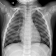

In [18]:
data = ImageDataBunch.from_folder(images_full, valid='val', test='test', size=224//4)

print(data.train_dl.items[10])
print(data.train_ds[10][0].size, type(data.train_ds[10][0]))
data.train_ds[10][0]

# Look at Individual Images

In [19]:
data = ImageDataBunch.from_folder(images_full, valid='val', test='test')

C:\Users\ddwil\Anaconda3\envs\fastai\lib\site-packages\fastai\basic_data.py:271: UserWarning: It's not possible to collate samples of your dataset together in a batch.
Shapes of the inputs/targets:
[[torch.Size([3, 1440, 1888]), torch.Size([3, 856, 1320]), torch.Size([3, 1908, 2036]), torch.Size([3, 576, 888]), torch.Size([3, 1013, 1476]), torch.Size([3, 584, 792]), torch.Size([3, 1175, 1716]), torch.Size([3, 1144, 1670]), torch.Size([3, 440, 750]), torch.Size([3, 1233, 1596]), torch.Size([3, 1661, 1910]), torch.Size([3, 1272, 1560]), torch.Size([3, 1160, 1416]), torch.Size([3, 656, 824]), torch.Size([3, 1286, 1542]), torch.Size([3, 784, 1248]), torch.Size([3, 632, 1024]), torch.Size([3, 1672, 1955]), torch.Size([3, 1472, 1832]), torch.Size([3, 1280, 1648]), torch.Size([3, 735, 1164]), torch.Size([3, 735, 1022]), torch.Size([3, 752, 1240]), torch.Size([3, 855, 1330]), torch.Size([3, 1295, 1584]), torch.Size([3, 920, 1280]), torch.Size([3, 952, 1360]), torch.Size([3, 1631, 1928]), torch

You can deactivate this warning by passing `no_check=True`.


data\chest_xray\train\NORMAL\IM-0135-0001.jpeg
torch.Size([1581, 1724]) <class 'fastai.vision.image.Image'>


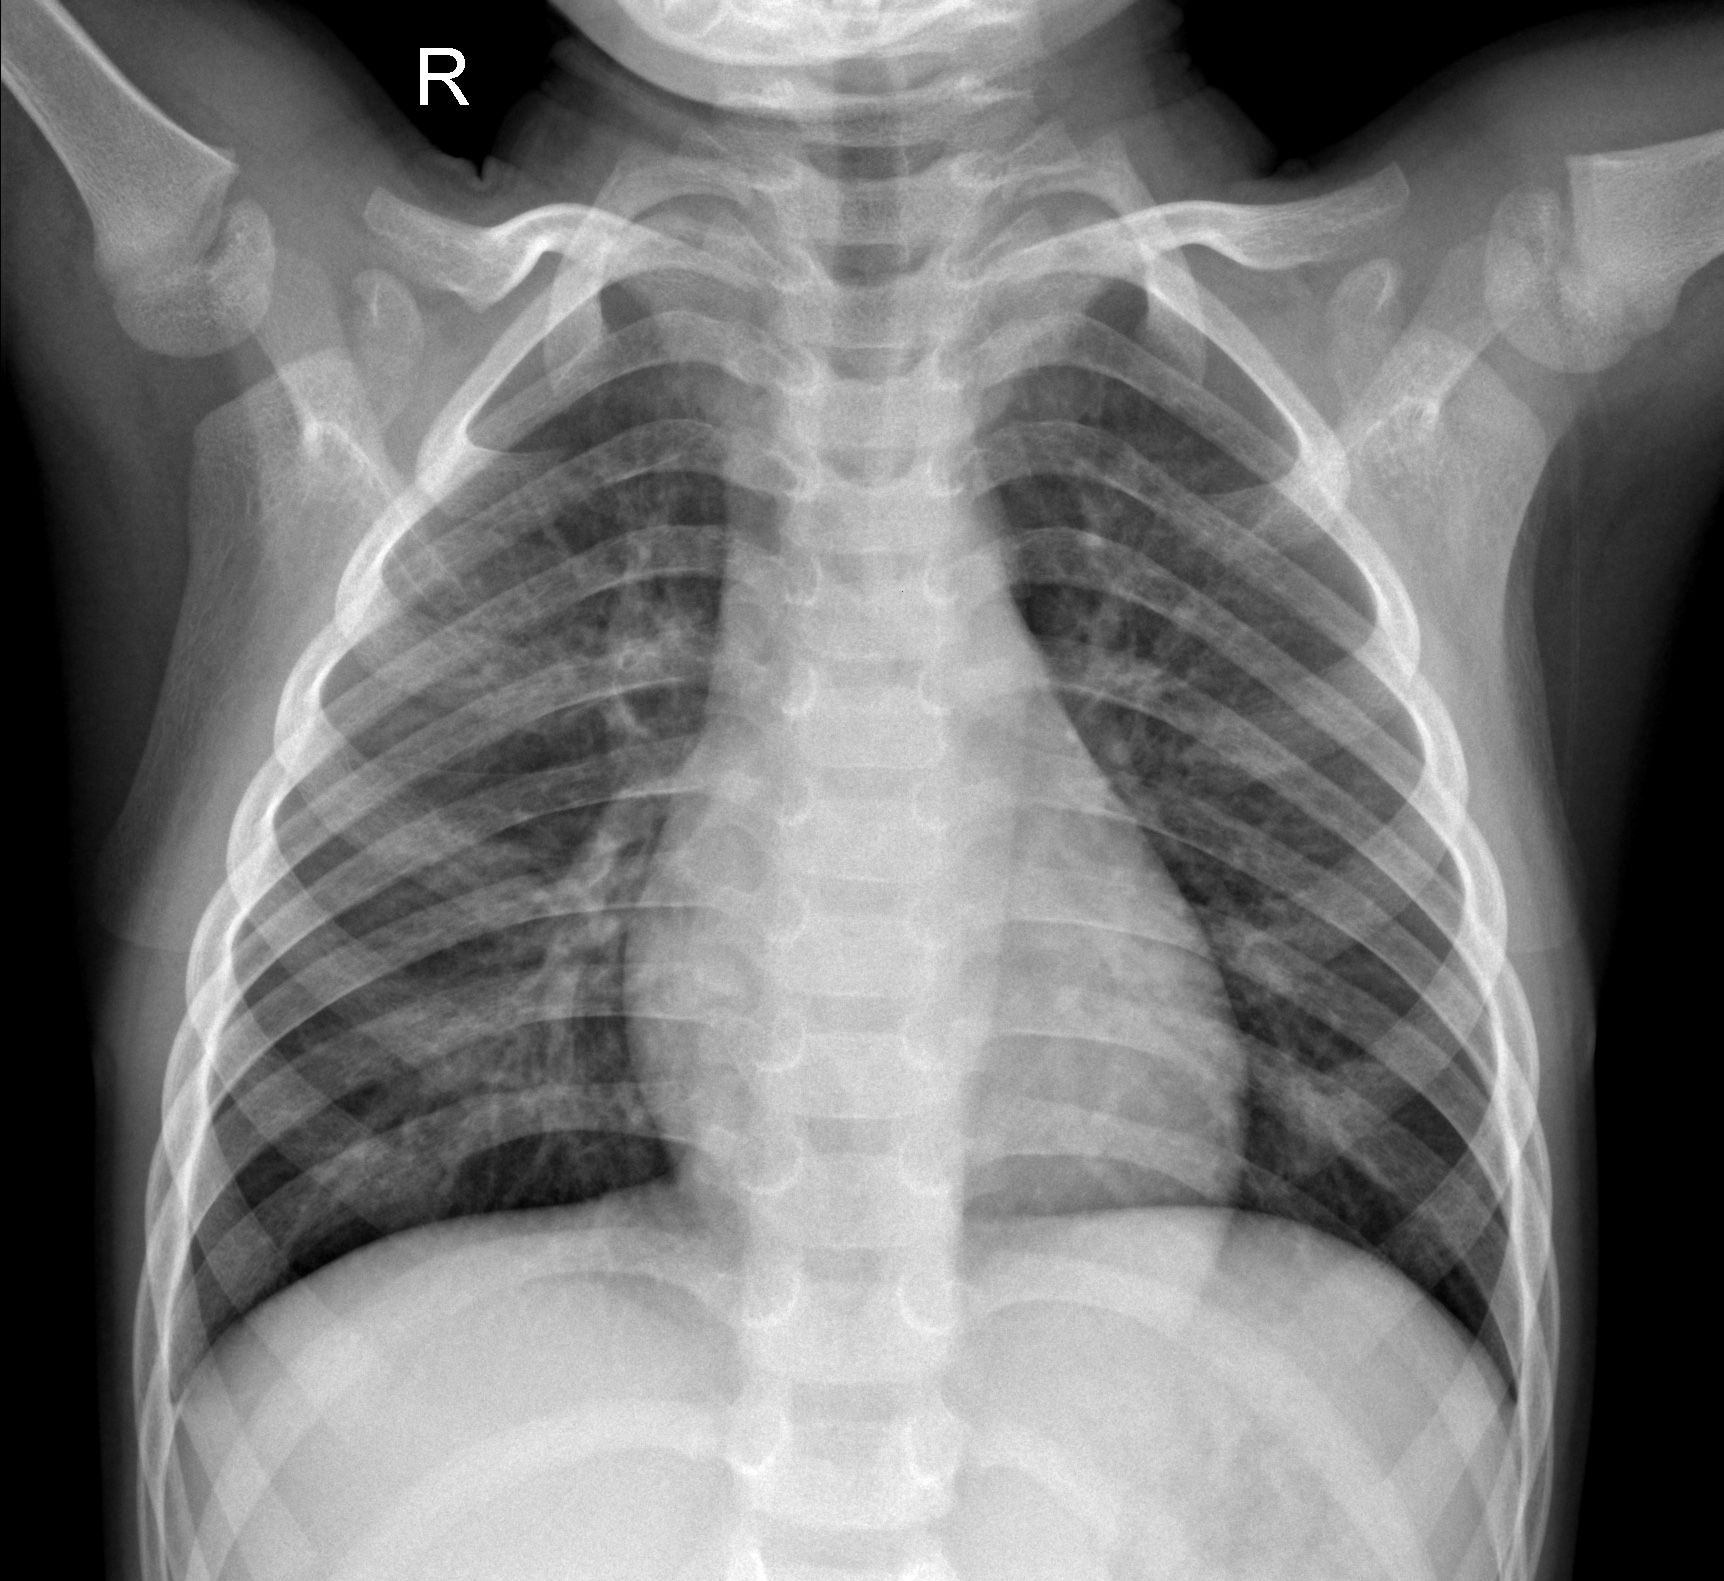

In [20]:
print(data.train_dl.items[10])
print(data.train_ds[10][0].size, type(data.train_ds[10][0]))
data.train_ds[10][0]

(1724, 1581) <class 'PIL.JpegImagePlugin.JpegImageFile'>


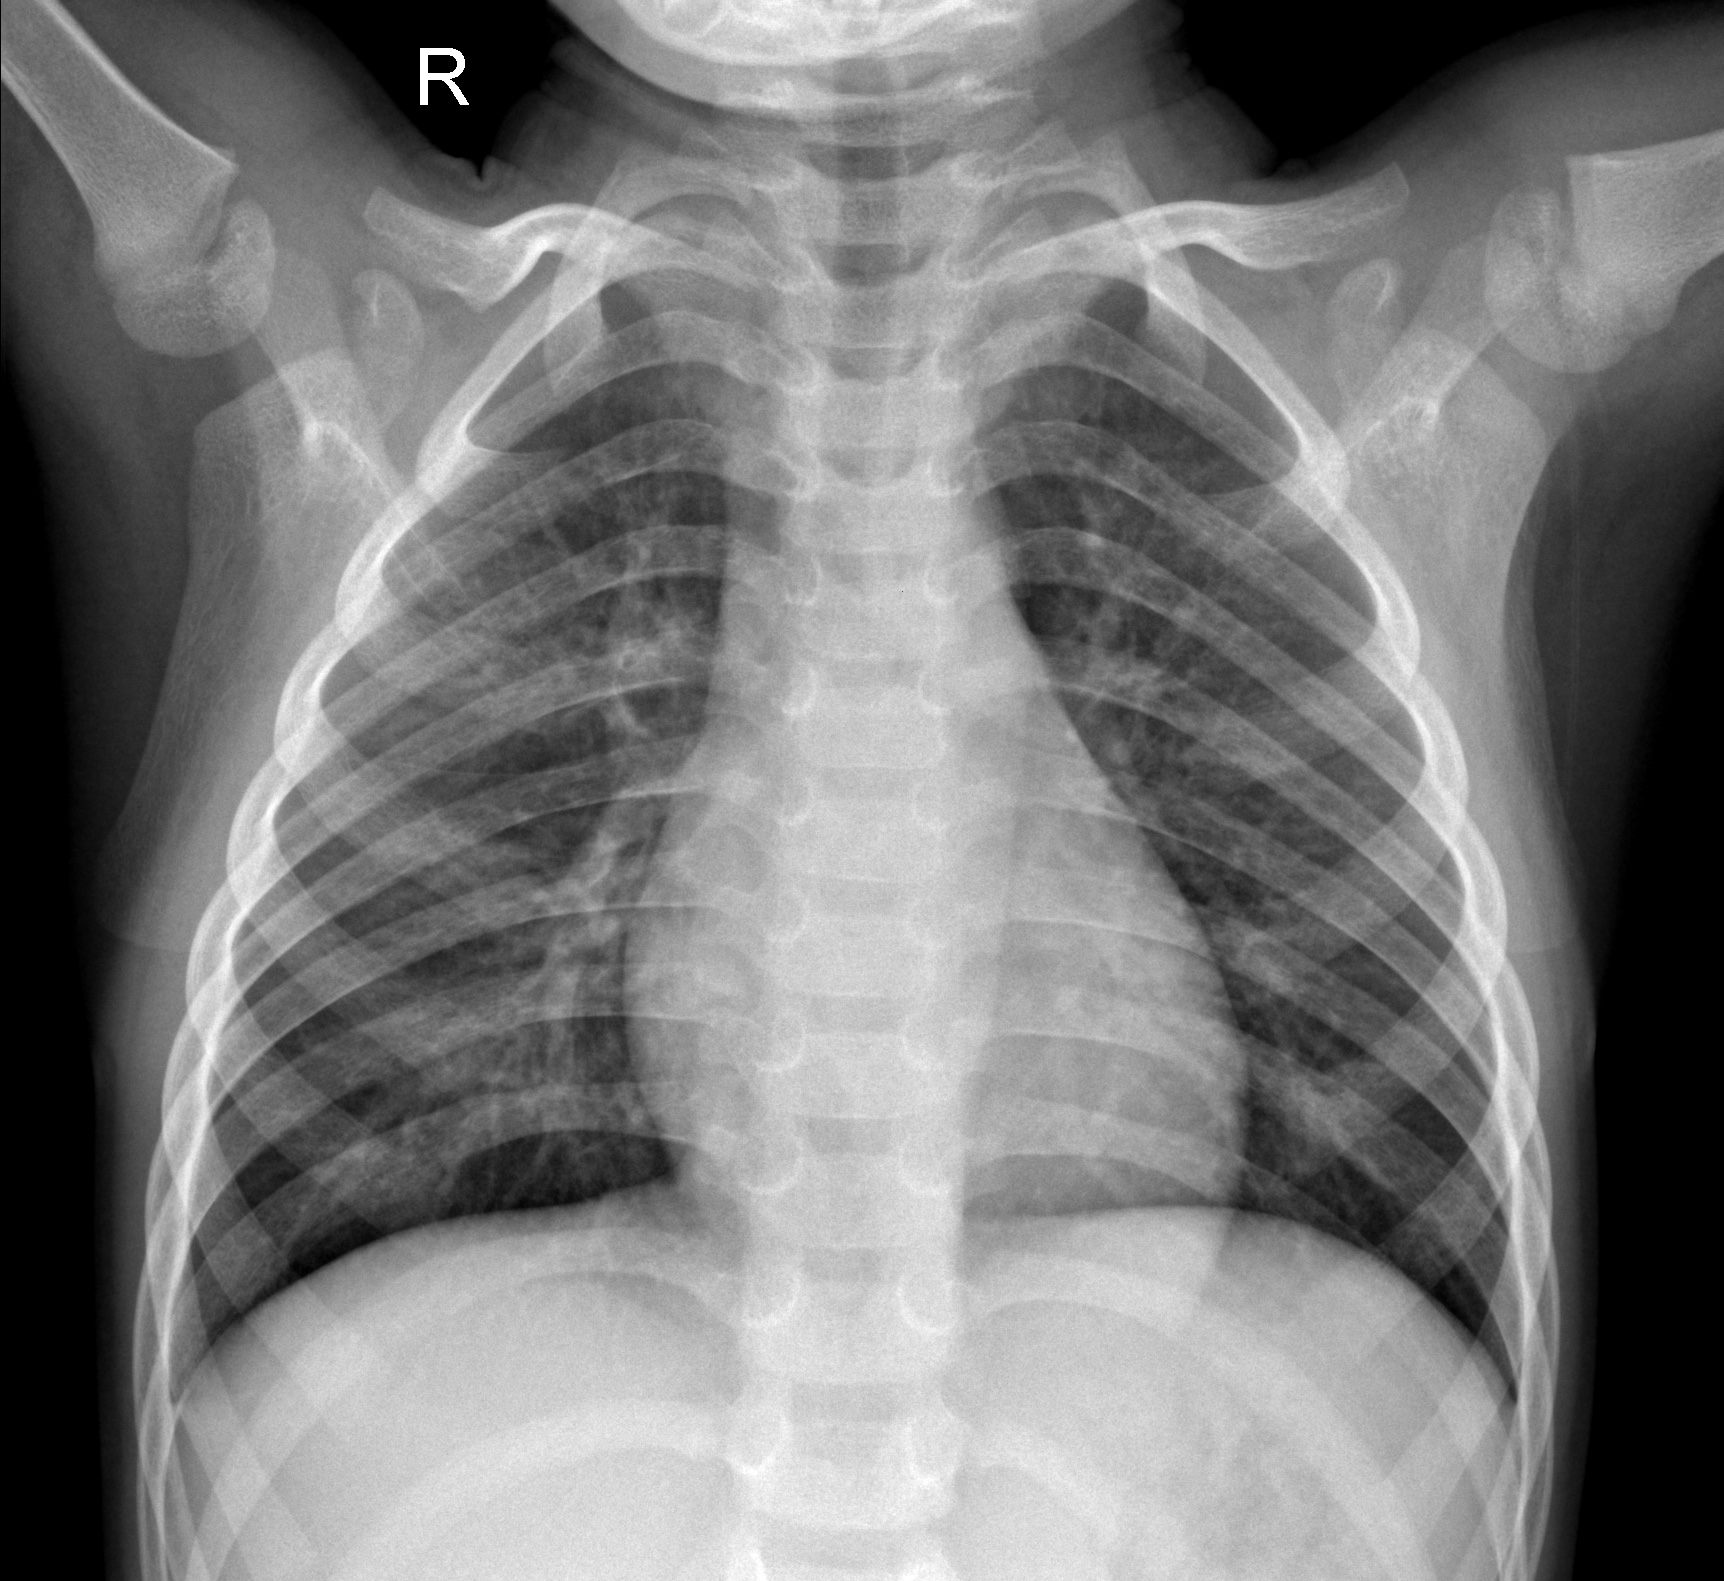

In [21]:
img = PIL.Image.open(data.train_dl.items[10])
print(img.size, type(img))
img

<class 'fastai.vision.image.Image'> <class 'fastai.core.Category'> torch.Size([1581, 1724])


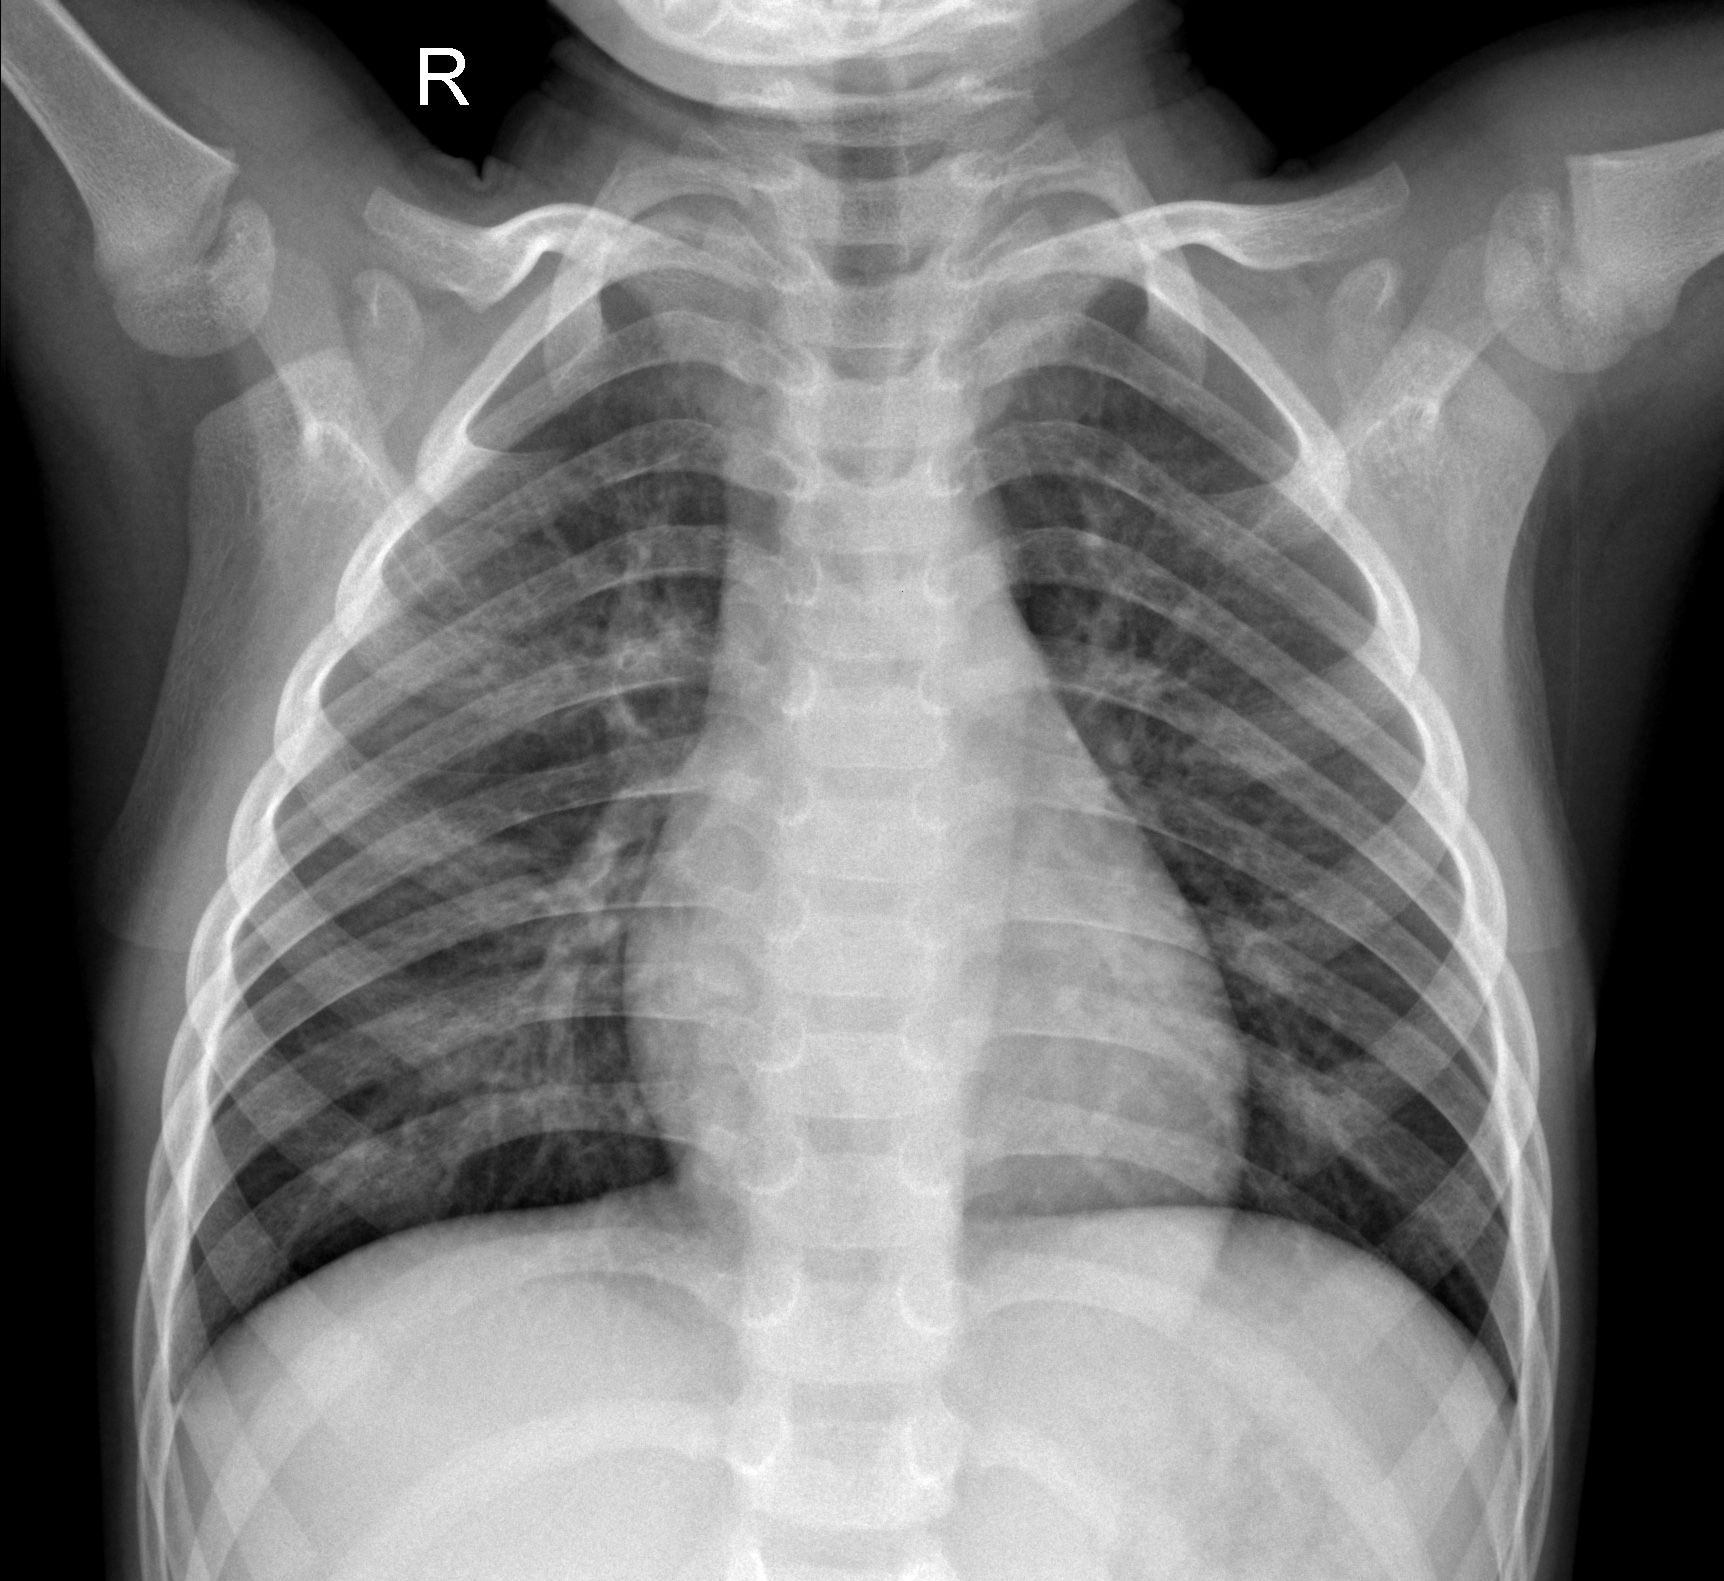

In [22]:
ds = data.train_ds
img, label = ds[10]
print(type(img), type(label), img.size)
img